In [30]:
import numpy as np

np.random.seed(0)

In [31]:
from keras.datasets import mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#printing the shapes of the vectors 
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [32]:
print(type(train_images))

<class 'numpy.ndarray'>


In [33]:
# Preprocess training and test images
train_images = train_images.reshape((60000, 784))  # Flatten images (60000, 28, 28) -> (60000, 784)
train_images = train_images.astype('float32') / 255  # Normalize pixel values

test_images = test_images.reshape((10000, 784))  # Flatten images (10000, 28, 28) -> (10000, 784)

test_images = test_images.astype('float32') / 255  # Normalize pixel values

In [34]:
#printing the shapes of the vectors 
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

train_images: (60000, 784)
train_labels: (60000,)
test_images:  (10000, 784)
test_labels:  (10000,)


In [35]:
train_labels=train_labels.reshape(60000,1)
test_labels = test_labels.reshape(10000,1)
print('train_labels: ' + str(train_labels.shape))
print('test_labels:  '  + str(test_labels.shape))

train_labels: (60000, 1)
test_labels:  (10000, 1)


In [36]:
print(type(train_images[4]))

<class 'numpy.ndarray'>


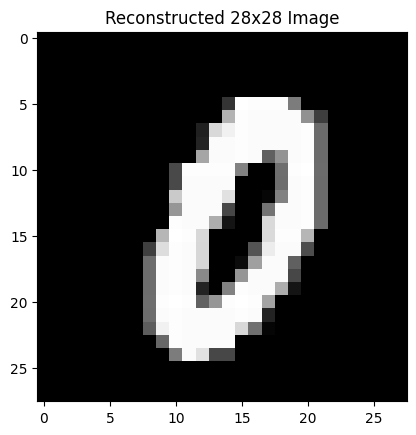

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 28x28 image (you would replace this with your image data)
image_flattened = train_images[34]  # Example random image

# Display the original image
# plt.imshow(image_flattened, cmap='gray')
# plt.title('Original 28x28 Image')
# plt.show()

# Flatten the image into a 784x1 vector
# image_flattened = image_28x28.reshape(784, 1)

# Reconstruct the image back into a 28x28 matrix
image_reconstructed = image_flattened.reshape(28, 28)

# Display the reconstructed image
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed 28x28 Image')
plt.show()

# Check if the reconstructed image matches the original
# You can calculate the mean squared error (MSE) to verify
# mse = np.mean((image_flattened - image_reconstructed)**2)
# print(f"Mean Squared Error (MSE) between original and reconstructed image: {mse}")


In [10]:
print(min(image_flattened))
print(max(image_flattened))
b0 = 0
b1 = 0
for element in image_flattened:
    if element == 0:
        b0 += 1
    else:
        b1 += 1
print(b0,b1)

0.0
1.0
601 183


In [14]:
print(train_labels)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [38]:
input_size = 1 # 28 * 28 = 784

# Size of the hidden layer (choose an appropriate value based on task complexity)
hidden_size = 128  # Example: Using 128 neurons in the hidden layer

# Size of the output layer (number of output units)
output_size = 784  # 28 * 28 = 784 (output image size)

# Print the defined variables
print(f"Size of input layer (n_x): {input_size}")
print(f"Size of hidden layer (n_h): {hidden_size}")
print(f"Size of output layer (n_y): {output_size}")

Size of input layer (n_x): 1
Size of hidden layer (n_h): 128
Size of output layer (n_y): 784


In [136]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

parameters = initialize_parameters(input_size, hidden_size, output_size)

In [137]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01764052]
 [ 0.00400157]
 [ 0.00978738]
 [ 0.02240893]
 [ 0.01867558]
 [-0.00977278]
 [ 0.00950088]
 [-0.00151357]
 [-0.00103219]
 [ 0.00410599]
 [ 0.00144044]
 [ 0.01454274]
 [ 0.00761038]
 [ 0.00121675]
 [ 0.00443863]
 [ 0.00333674]
 [ 0.01494079]
 [-0.00205158]
 [ 0.00313068]
 [-0.00854096]
 [-0.0255299 ]
 [ 0.00653619]
 [ 0.00864436]
 [-0.00742165]
 [ 0.02269755]
 [-0.01454366]
 [ 0.00045759]
 [-0.00187184]
 [ 0.01532779]
 [ 0.01469359]
 [ 0.00154947]
 [ 0.00378163]
 [-0.00887786]
 [-0.01980796]
 [-0.00347912]
 [ 0.00156349]
 [ 0.01230291]
 [ 0.0120238 ]
 [-0.00387327]
 [-0.00302303]
 [-0.01048553]
 [-0.01420018]
 [-0.0170627 ]
 [ 0.01950775]
 [-0.00509652]
 [-0.00438074]
 [-0.01252795]
 [ 0.0077749 ]
 [-0.01613898]
 [-0.0021274 ]
 [-0.00895467]
 [ 0.00386902]
 [-0.00510805]
 [-0.01180632]
 [-0.00028182]
 [ 0.00428332]
 [ 0.00066517]
 [ 0.00302472]
 [-0.00634322]
 [-0.00362741]
 [-0.0067246 ]
 [-0.00359553]
 [-0.00813146]
 [-0.01726283]
 [ 0.00177426]
 [-0.00401781]
 [-0.

In [138]:
print(parameters['W2'].shape)

(784, 128)


In [139]:
# sigmoid activation function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

In [149]:
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))


In [140]:
print(type(train_labels))
c = parameters['b1']
print(type(c))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [141]:
# forward propagation
def forward_propagation(X, parameters):
    # retrieve the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # compute the activation of the hidden layer
    Z1 = np.dot(W1, X.T) + b1
    # print(Z1.shape)
    A1 = sigmoid(Z1)
    # print(A1.shape)
    # compute the activation of the output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # print(Z2.shape)
    # print(A2.shape)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache



In [142]:
A2, cache = forward_propagation(train_labels, parameters)

In [143]:
print(A2.shape)

(784, 60000)


In [144]:
print(train_images.shape)
print(A2.shape)
a1 = cache['A1']
print(parameters['W2'].shape)
print(a1.shape)

(60000, 784)
(784, 60000)
(784, 128)
(128, 60000)


In [150]:
# binary cross-entropy loss function
def binary_cross_entropy_loss(A2, y):
    epsilon = 1e-8
    m = y.shape[0]
    # loss = -(1/m) * np.sum(y*np.log(A2.T) + (1-y)*np.log(1-A2.T))
    loss = -(1/m) * np.sum(y * np.log(A2.T + epsilon) + (1 - y) * np.log(1 - A2.T + epsilon))
    return loss

In [108]:
print(cache['A2'].shape)

(784, 60000)


In [135]:
print(parameters['W2'].shape)

(784, 128)


In [151]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # YOUR CODE ENDS HERE
        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)
    # A1 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    A1 = cache['A1']
    A2 = cache['A2']
    
    # YOUR CODE ENDS HERE
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    dZ2 = A2 - Y.T
    dW2 = np.dot(dZ2,A1.T)
    dW2 = dW2/m
    db2 = (np.sum(dZ2,axis = 1, keepdims = True))/m
    print('db2 shape',db2.shape)
    print('w2 shape ', W2.shape)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1,X)/m
    db1 = np.sum(dZ1, axis = 1, keepdims=True)/m
    
    
    # YOUR CODE ENDS HERE
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [152]:
# update parameters
def update_parameters(parameters, gradients, learning_rate):
    # retrieve the gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # retrieve the weights and biases
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # update the weights and biases
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [153]:
# train the neural network
def train(X, y, num_iterations, learning_rate):
    # initialize the weights and biases
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    
    for i in range(num_iterations):
        # forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # compute the loss
        loss = binary_cross_entropy_loss(A2, y)
        
        # backward propagation
        gradients = backward_propagation(parameters, cache, X, y)
        
        # update the parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        # if i % 1000:
        print(f"iteration {i}: loss = {loss}")
    
    return parameters

parameters = train(train_labels, train_images, num_iterations=10000, learning_rate=0.1)

db2 shape (784, 1)
w2 shape  (784, 128)
iteration 0: loss = 544.1471466679554
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 1: loss = 1876.9329298979685
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 2: loss = 3225.8770217593988
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 3: loss = 2516.908300091979
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 4: loss = 2611.492409402964
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 5: loss = 2596.8146941137757
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 6: loss = 2568.3974319716835
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 7: loss = 2495.0484081331283
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 8: loss = 2565.1190767696617
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 9: loss = 2480.0985346777943
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 10: loss = 2488.427167766791
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 11: loss = 2467.850935203095
db2 shape (784, 1)
w2 shape  (784, 128)
iteration 12: l